## Acquisition Analytics : Bank Marketing

We will understand the business objective and understand the data using univariate and multivariate analysis. Then we'll build multiple supervised learning models, choose the best among them and analyze the financial benefits of the analytics project.

- Data Understanding
- Data Cleaning
- Data Preparation
- Data Modelling
- Model Evaluation

The objective is to reduce the customer acquisition cost by targeting the ones who are likely to buy and to improve the response rate, i.e. the fraction of prospects who respond to the campaign.

### Data Understanding

The first step in solving any machine learning problem is data understanding. We will import the requisite libraries and apply univariate and multivariate analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\C6BFSI\\Module2\\bank_marketing.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [3]:
loan.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

We can note that the dataset has 41188 data entries across 21 columns, one of them being the response (Target variable). Another thing to note is that there are no null values. That is, the dataset is completely clean.

In [4]:
# let's look at the first few rows of the dataframe
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Looking at all the column names
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response'],
      dtype='object')

In [6]:
loan['response'].value_counts()

no     36548
yes     4640
Name: response, dtype: int64

As we note that the response variable has 'yes' and 'no' responses, we will convert it to 1 and 0 respectively

In [7]:
loan['response'] = loan['response'].map({'yes': 1, 'no': 0})

In [8]:
loan['response'].head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [9]:
loan['response'].value_counts()

0    36548
1     4640
Name: response, dtype: int64

In [10]:
# Copy the dataset into a back up dataframe for future use

loan_copy = loan

In [11]:
# Determine the percentage of people who have bought the investment product, that is those who have the response varibale as 1

100*(loan['response'].sum()/loan['response'].count()).round(4)

11.27

### Exploratory Data Analysis

Now, we will do Exploratory Data Analysis on individual features and look for patterns.

First, we will look at the client data.

- Age
- Job : type of job
- Marital : marital status
- Education
- Default: has credit in default?
- Housing: has housing loan?
- Loan: has personal loan?

#### Age

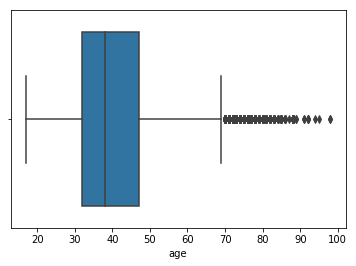

In [12]:
sns.boxplot(x='age', data=loan)
plt.show()

In [13]:
# Since there are a fair few data entries with age > 71, we will club all of those ages at 71 (since we can assume 
# that the behaviour will not change significantly with age at age above 70)

loan['age'][loan['age']>71] =71

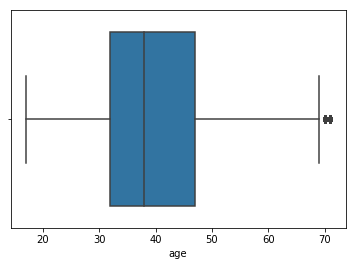

In [14]:
sns.boxplot(x='age', data=loan)
plt.show()

In [15]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(10,loan['age'].max() + 10, 10)
loan['age_bins'] = pd.cut(loan['age'], bins, include_lowest=True)

In [16]:
No_of_prospect = loan.groupby('age_bins')['response'].count().reset_index(name = 'No.of_prospect')

In [17]:
count_prospects = loan[loan['response']==1].groupby('age_bins')['response'].count().reset_index(name = 'count_prospects')

In [18]:
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')

In [19]:
agg_age['response_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)

In [20]:
agg_age

,age_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",140,57,40.7
1,"(20.0, 30.0]",7243,1067,14.7
2,"(30.0, 40.0]",16385,1597,9.7
3,"(40.0, 50.0]",10240,837,8.2
4,"(50.0, 60.0]",6270,668,10.7
5,"(60.0, 70.0]",488,212,43.4
6,"(70.0, 80.0]",422,202,47.9


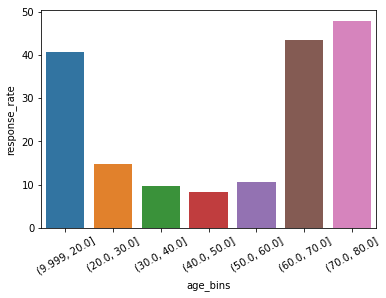

In [21]:
ax = sns.barplot(x='age_bins', y='response_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

As we can see, the youngest and the eldest are the most likely to buy the investment product being offered by the bank.

In [22]:
# Note that we have added a new column named age bucket to the table

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_bins
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"


Similarly, we will look at the relation between response rate and job. Note that since job is already a categorical variable, we don't need to bucket the data

#### Job

In [23]:
loan['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [24]:
count_prospects_job = loan.groupby('job')['response'].sum().reset_index(name = 'count_prospects')

In [25]:
No_of_prospect_job = loan.groupby('job')['response'].count().reset_index(name = 'No_of_prospects')

In [26]:
agg_job = count_prospects_job.merge(No_of_prospect_job, on = 'job')

In [27]:
agg_job['response_rate'] = 100*(agg_job['count_prospects']/agg_job['No_of_prospects']).round(4)

In [28]:
agg_job

,job,count_prospects,No_of_prospects,response_rate
0,admin.,1352,10422,12.97
1,blue-collar,638,9254,6.89
2,entrepreneur,124,1456,8.52
3,housemaid,106,1060,10.00
4,management,328,2924,11.22
5,retired,434,1720,25.23
6,self-employed,149,1421,10.49
7,services,323,3969,8.14
8,student,275,875,31.43
9,technician,730,6743,10.83


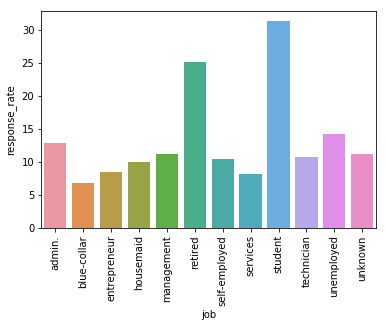

In [29]:
ax = sns.barplot(x='job', y='response_rate', data=agg_job)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

We can draw similarities from the age response analysis where we found that the youngest and eldest were most likely to respond in a positive manner. It is rreiterated by the above analysis, where we notice that student and retired have the highest response rates.

#### Marital

In [30]:
loan['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Since there are 80 entries which list marital status as 'unknown', we will assign them to the biggest group, which is, 'married'.

In [31]:
loan.replace({'marital' : { 'unknown' : 'married'}}, inplace=True)

In [32]:
count_prospects_marital = loan.groupby('marital')['response'].sum().reset_index(name = 'count_prospects')

In [33]:
No_of_prospect_job = loan.groupby('marital')['response'].count().reset_index(name = 'No_of_prospects')

In [34]:
agg_marital = count_prospects_marital.merge(No_of_prospect_job, on = 'marital')

In [35]:
agg_marital['response_rate'] = 100*(agg_marital['count_prospects']/agg_marital['No_of_prospects']).round(4)

In [36]:
agg_marital

,marital,count_prospects,No_of_prospects,response_rate
0,divorced,476,4612,10.32
1,married,2544,25008,10.17
2,single,1620,11568,14.00


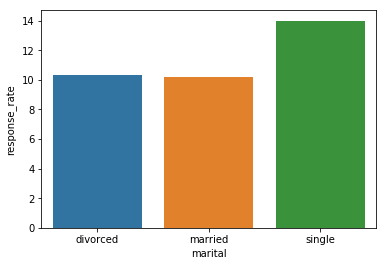

In [37]:
ax = sns.barplot(x='marital', y='response_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You may note that there is a slight uptick in response rate for single customers, this can be attributed in part to the fact that people under the age of 20 have a very high response rate. 

#### Education

In [38]:
loan['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

To simplify the problem, we are going to convert the educational qualifications to simple buckets of primary educations, secondary education, tertiary education and professional courses. Also note that there are 18 entries listing the educational status as illiterate. Since the closest group to them is primary education, we are going to assign all entries with educational status as illiterate to primary education.

In [39]:
loan.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

In [40]:
loan['education'].value_counts()

Primary_Education      12531
Tertiary_Education     12168
Secondary_Education     9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

In [41]:
count_prospects_education = loan.groupby('education')['response'].sum().reset_index(name = 'count_prospects')

In [42]:
No_of_prospect_education = loan.groupby('education')['response'].count().reset_index(name = 'No_of_prospects')

In [43]:
agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'education')

In [44]:
agg_education['response_rate'] = 100*(agg_education['count_prospects']/agg_education['No_of_prospects']).round(4)

In [45]:
agg_education

,education,count_prospects,No_of_prospects,response_rate
0,Primary_Education,1093,12531,8.72
1,Secondary_Education,1031,9515,10.84
2,Tertiary_Education,1670,12168,13.72
3,professional.course,595,5243,11.35
4,unknown,251,1731,14.50


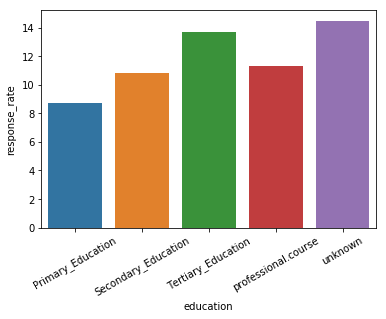

In [46]:
ax = sns.barplot(x='education', y='response_rate', data=agg_education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

You can note that the response rate is lowest for people with highest education qualification as primary education, which may be attributed, in part, to lack of awareness and a lack of trust between the bank and the customer. It is the highest for people with tertiary education.

#### Previous Default

In [47]:
loan['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [48]:
count_prospects_default = loan.groupby('default')['response'].sum().reset_index(name = 'count_prospects')

In [49]:
No_of_prospect_default = loan.groupby('default')['response'].count().reset_index(name = 'No_of_prospects')

In [50]:
agg_default = count_prospects_default.merge(No_of_prospect_default, on = 'default')

In [51]:
agg_default['response_rate'] = 100*(agg_default['count_prospects']/agg_default['No_of_prospects']).round(4)

In [52]:
agg_default

,default,count_prospects,No_of_prospects,response_rate
0,no,4197,32588,12.88
1,unknown,443,8597,5.15
2,yes,0,3,0.00


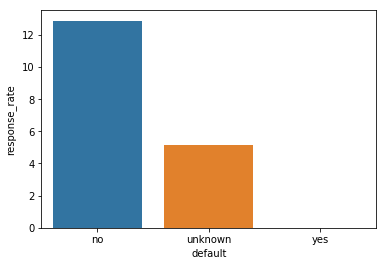

In [53]:
ax = sns.barplot(x='default', y='response_rate', data=agg_default)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Housing

In [54]:
loan['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [55]:
count_prospects_housing = loan.groupby('housing')['response'].sum().reset_index(name = 'count_prospects')

In [56]:
No_of_prospect_housing = loan.groupby('housing')['response'].count().reset_index(name = 'No_of_prospects')

In [57]:
agg_housing = count_prospects_housing.merge(No_of_prospect_housing, on = 'housing')

In [58]:
agg_housing['response_rate'] = 100*(agg_housing['count_prospects']/agg_housing['No_of_prospects']).round(4)

In [59]:
agg_housing

,housing,count_prospects,No_of_prospects,response_rate
0,no,2026,18622,10.88
1,unknown,107,990,10.81
2,yes,2507,21576,11.62


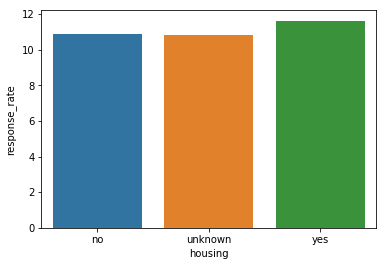

In [60]:
ax = sns.barplot(x='housing', y='response_rate', data=agg_housing)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that there is a slight uptick in the response rate for people with housing, though it is probably not very significant

#### Loan

In [61]:
loan['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [62]:
count_prospects_loan = loan.groupby('loan')['response'].sum().reset_index(name = 'count_prospects')

In [63]:
No_of_prospect_loan = loan.groupby('loan')['response'].count().reset_index(name = 'No_of_prospects')

In [64]:
agg_loan = count_prospects_loan.merge(No_of_prospect_loan, on = 'loan')

In [65]:
agg_loan['response_rate'] = 100*(agg_loan['count_prospects']/agg_loan['No_of_prospects']).round(4)

In [66]:
agg_loan

,loan,count_prospects,No_of_prospects,response_rate
0,no,3850,33950,11.34
1,unknown,107,990,10.81
2,yes,683,6248,10.93


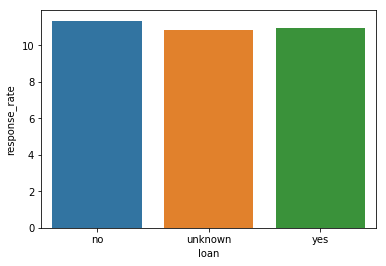

In [67]:
ax = sns.barplot(x='loan', y='response_rate', data=agg_loan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can see there seems to be very little correlation between a prospect having a personal loan and the likelihood of him/her responding positively to the investment product

Now that we have had a look at the client data, we will move to the last contact information.

There are four features in the given dataset which cover this information. (Refer to the data dictionary for the same)

- Contact: contact communication type
- Month: last contact month of year
- Day_of_week: last contact day of the week
- Duration: last contact duration, in seconds 

Please note that the attribute, duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Contact

In [68]:
loan['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [69]:
count_prospects_contact = loan.groupby('contact')['response'].sum().reset_index(name = 'count_prospects')

In [70]:
No_of_prospect_contact = loan.groupby('contact')['response'].count().reset_index(name = 'No_of_prospects')

In [71]:
agg_contact = count_prospects_contact.merge(No_of_prospect_contact, on = 'contact')

In [72]:
agg_contact['response_rate'] = 100*(agg_contact['count_prospects']/agg_contact['No_of_prospects']).round(4)

In [73]:
agg_contact

,contact,count_prospects,No_of_prospects,response_rate
0,cellular,3853,26144,14.74
1,telephone,787,15044,5.23


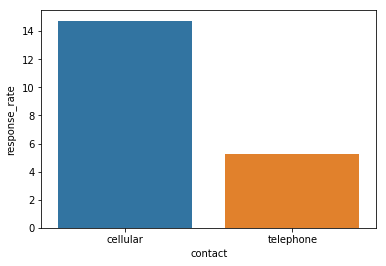

In [74]:
ax = sns.barplot(x='contact', y='response_rate', data=agg_contact)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that the prospective customers contacted through cellular medium are significantly ore likely to opt in to the investment scheme compared to customers contacted through telephonic medium.

#### Month

In [75]:
loan['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [76]:
count_prospects_month = loan.groupby('month')['response'].sum().reset_index(name = 'count_prospects')

In [77]:
No_of_prospect_month = loan.groupby('month')['response'].count().reset_index(name = 'No_of_prospects')

In [78]:
agg_month = count_prospects_month.merge(No_of_prospect_month, on = 'month')

In [79]:
agg_month['response_rate'] = 100*(agg_month['count_prospects']/agg_month['No_of_prospects']).round(4)

In [80]:
agg_month

,month,count_prospects,No_of_prospects,response_rate
0,apr,539,2632,20.48
1,aug,655,6178,10.60
2,dec,89,182,48.90
3,jul,649,7174,9.05
4,jun,559,5318,10.51
5,mar,276,546,50.55
6,may,886,13769,6.43
7,nov,416,4101,10.14
8,oct,315,718,43.87
9,sep,256,570,44.91


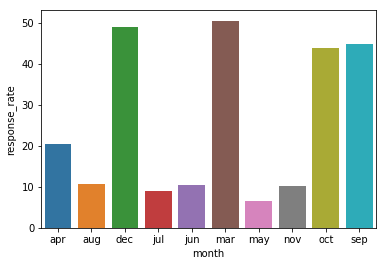

In [81]:
ax = sns.barplot(x='month', y='response_rate', data=agg_month)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the four months of december, march, october and september appear to be the best to contact the potential customers. However, please note that these our months have the fewest data entries as well, so it is not certain, how well it would behave when calls are made at a high volume.

#### Day of the week

In [82]:
loan['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [83]:
count_prospects_day = loan.groupby('day_of_week')['response'].sum().reset_index(name = 'count_prospects')

In [84]:
No_of_prospect_day = loan.groupby('day_of_week')['response'].count().reset_index(name = 'No_of_prospects')

In [85]:
agg_day = count_prospects_day.merge(No_of_prospect_day, on = 'day_of_week')

In [86]:
agg_day['response_rate'] = 100*(agg_day['count_prospects']/agg_day['No_of_prospects']).round(4)

In [87]:
agg_day

,day_of_week,count_prospects,No_of_prospects,response_rate
0,fri,846,7827,10.81
1,mon,847,8514,9.95
2,thu,1045,8623,12.12
3,tue,953,8090,11.78
4,wed,949,8134,11.67


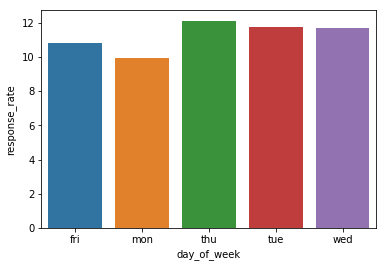

In [88]:
ax = sns.barplot(x='day_of_week', y='response_rate', data=agg_day)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can note that response rate is lowest on monday, while being highest on thursday. However, the gap isn't very big.

#### Duration of the call

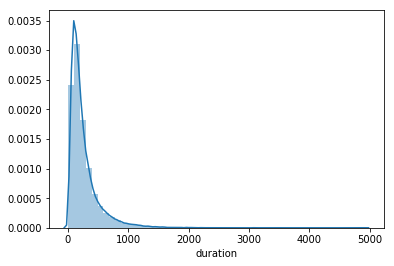

In [89]:
sns.distplot(loan['duration'])
plt.show()

As we know that this is a continuos variable, we will create a box plot

In [90]:
loan['duration'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
95%        752.650000
99%       1271.130000
max       4918.000000
Name: duration, dtype: float64

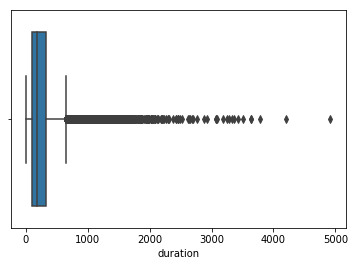

In [91]:
sns.boxplot(x='duration', data=loan)
plt.show()

Since less than one percent of entires have duration greater than 1271, we can assume all entries with duration greater than 1271 as having duration as 1271.

In [92]:
loan['duration'][loan['duration']>1271] =1271

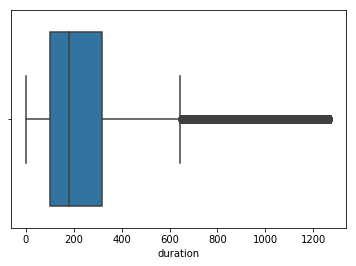

In [93]:
sns.boxplot(x='duration', data=loan)
plt.show()

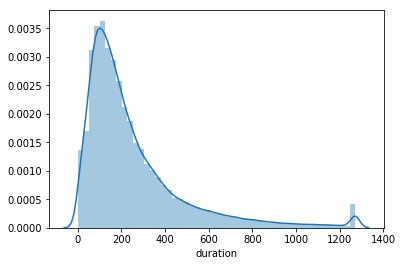

In [94]:
sns.distplot(loan['duration'])
plt.show()

Now that we have looked at client data and the data related to last contact, we will look at some of the other attributes.

- Campaign: number of contacts performed during this campaign and for this client
- Pdays: number of days that passed by after the client was last contacted from a previous campaign
- Previous: number of contacts performed before this campaign and for this client
- Poutcome: outcome of the previous marketing campaign

#### Campaign

In [95]:
loan['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

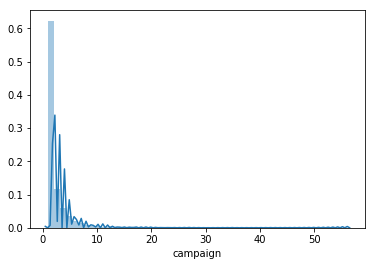

In [96]:
sns.distplot(loan['campaign'])
plt.show()

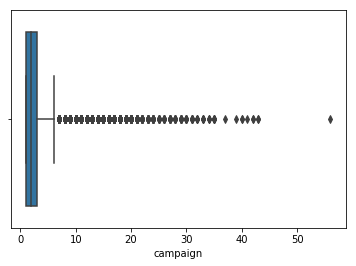

In [97]:
# We will create a box plot

sns.boxplot(x='campaign', data=loan)
plt.show()

In [98]:
loan['campaign'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          7.000000
99%         14.000000
max         56.000000
Name: campaign, dtype: float64

Once again, we can merga all data entries with contacts greater than 14 as having campaign contact as 14

In [99]:
loan['campaign'][loan['campaign']>14] =14

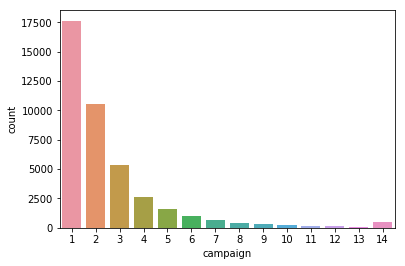

In [100]:
sns.countplot(loan['campaign'])
plt.show()

In [101]:
count_prospects_campaign = loan.groupby('campaign')['response'].sum().reset_index(name = 'count_prospects')

In [102]:
No_of_prospect_campaign = loan.groupby('campaign')['response'].count().reset_index(name = 'No_of_prospects')

In [103]:
agg_campaign = count_prospects_campaign.merge(No_of_prospect_campaign, on = 'campaign')

In [104]:
agg_campaign['response_rate'] = 100*(agg_campaign['count_prospects']/agg_campaign['No_of_prospects']).round(4)

In [105]:
agg_campaign

,campaign,count_prospects,No_of_prospects,response_rate
0,1,2300,17642,13.04
1,2,1211,10570,11.46
2,3,574,5341,10.75
3,4,249,2651,9.39
4,5,120,1599,7.50
5,6,75,979,7.66
6,7,38,629,6.04
7,8,17,400,4.25
8,9,17,283,6.01
9,10,12,225,5.33


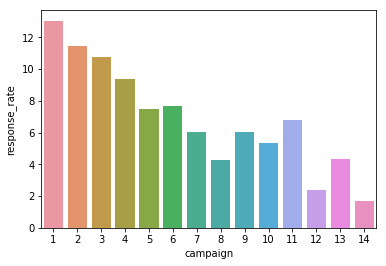

In [106]:
ax = sns.barplot(x='campaign', y='response_rate', data=agg_campaign)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Interesting to note, that the response rate gradually decreases as the number of campaign contacts increases.

#### Gap after the last contact

In [107]:
loan['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

We are going to divide the pdays into three buckets, that is contacted within the first ten days, contacted after first ten days and first time contacted. Note that the pdays value of 999 means client was bot previously contacted.

In [108]:
loan['pdays'][loan['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])]='Contacted_in_first_10days'

loan['pdays'][loan['pdays'].isin([999])]='First_time_contacted'

loan['pdays'][~loan['pdays'].isin(['Contacted_in_first_10days','First_time_contacted'])]='Contacted_after_10days'

In [109]:
loan['pdays'].value_counts()

First_time_contacted         39673
Contacted_in_first_10days     1311
Contacted_after_10days         204
Name: pdays, dtype: int64

In [110]:
count_prospects_pdays = loan.groupby('pdays')['response'].sum().reset_index(name = 'count_prospects')

In [111]:
No_of_prospect_pdays = loan.groupby('pdays')['response'].count().reset_index(name = 'No_of_prospects')

In [112]:
agg_pdays = count_prospects_pdays.merge(No_of_prospect_pdays, on = 'pdays')

In [113]:
agg_pdays['response_rate'] = 100*(agg_pdays['count_prospects']/agg_pdays['No_of_prospects']).round(4)

In [114]:
agg_pdays

,pdays,count_prospects,No_of_prospects,response_rate
0,Contacted_after_10days,116,204,56.86
1,Contacted_in_first_10days,851,1311,64.91
2,First_time_contacted,3673,39673,9.26


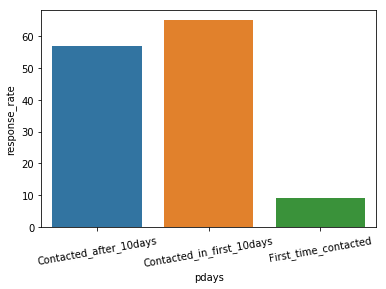

In [115]:
ax = sns.barplot(x='pdays', y='response_rate', data=agg_pdays)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
plt.show()

Though there is a huge difference in the response rates of the three categories, it is important to note that there is also a huge difference in the volume of data entries in these categories

#### Previous

In [116]:
loan['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Since the data ranges from 0 to 7, we are going to break it into three categories, that is never contacted, contacted less than three times and contacted greater than three times

In [117]:
loan['previous'][loan['previous'].isin([0])]='Never_contacted'
loan['previous'][loan['previous'].isin([1,2,3])]='Less_than_3_times'
loan['previous'][loan['previous'].isin([4,5,6,7])]='More_than_3_times'

In [118]:
loan['previous'].value_counts()

Never_contacted      35563
Less_than_3_times     5531
More_than_3_times       94
Name: previous, dtype: int64

In [119]:
count_prospects_previous = loan.groupby('previous')['response'].sum().reset_index(name = 'count_prospects')

In [120]:
No_of_prospect_previous = loan.groupby('previous')['response'].count().reset_index(name = 'No_of_prospects')

In [121]:
agg_previous = count_prospects_previous.merge(No_of_prospect_previous, on = 'previous')

In [122]:
agg_previous['response_rate'] = 100*(agg_previous['count_prospects']/agg_previous['No_of_prospects']).round(4)

In [123]:
agg_previous

,previous,count_prospects,No_of_prospects,response_rate
0,Less_than_3_times,1445,5531,26.13
1,More_than_3_times,54,94,57.45
2,Never_contacted,3141,35563,8.83


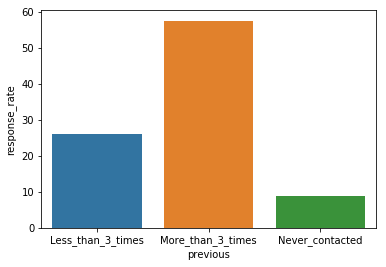

In [124]:
ax = sns.barplot(x='previous', y='response_rate', data=agg_previous)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the response rate is greatest for the the potential customers having previous contact of more than three. However, please note that  the number of data entries is very low for such cases, hence it's difficult to draw any inferences.

Now that we have analysed all the client related information, we will move to the wider social and economic variables, which gives us a clue of the conditions when a client is more likely to buy the product.

- emp.var.rate: Employment Variation Rate - Quarterly Indicator
- cons.price.idx: Consumer Price Index - Monthly Indicator 
- cons.conf.idx: Consumer Confidence Index - Monthly Indicator 
- euribor3m: Euribor 3 Month Rate - Daily Indicator
- nr.employed: Number of Employees - Quarterly Indicator

In [125]:
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

#### Employment Variation Rate

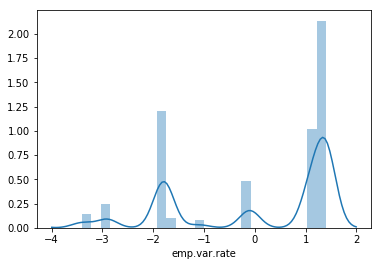

In [126]:
sns.distplot(loan['emp.var.rate'])
plt.show()

In [127]:
loan['emp.var.rate'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
95%          1.400000
99%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [128]:
loan['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [129]:
count_prospects_emp_var_rate = loan.groupby('emp.var.rate')['response'].sum().reset_index(name = 'count_prospects')

In [130]:
No_of_prospect_emp_var_rate = loan.groupby('emp.var.rate')['response'].count().reset_index(name = 'No_of_prospects')

In [131]:
agg_emp_var_rate = count_prospects_emp_var_rate.merge(No_of_prospect_emp_var_rate, on = 'emp.var.rate')

In [132]:
agg_emp_var_rate['response_rate'] = 100*(agg_emp_var_rate['count_prospects']/agg_emp_var_rate['No_of_prospects']).round(4)

In [133]:
agg_emp_var_rate

,emp.var.rate,count_prospects,No_of_prospects,response_rate
0,-3.4,454,1071,42.39
1,-3.0,88,172,51.16
2,-2.9,594,1663,35.72
3,-1.8,1461,9184,15.91
4,-1.7,403,773,52.13
5,-1.1,301,635,47.40
6,-0.2,1,10,10.00
7,-0.1,232,3683,6.30
8,1.1,240,7763,3.09
9,1.4,866,16234,5.33


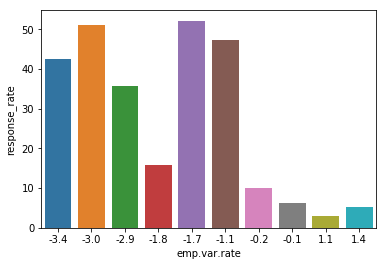

In [134]:
ax = sns.barplot(x='emp.var.rate', y='response_rate', data=agg_emp_var_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can note that a negative employment variation rate seems to be related to higher response rates.

#### Consumer Price Index

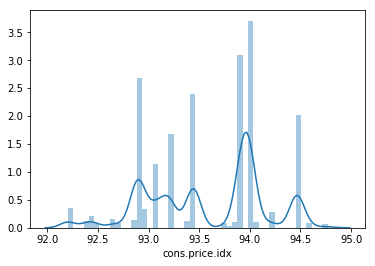

In [135]:
sns.distplot(loan['cons.price.idx'])
plt.show()

In [136]:
loan['cons.price.idx'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
95%         94.465000
99%         94.465000
max         94.767000
Name: cons.price.idx, dtype: float64

In [137]:
loan['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

#### Euribor three month rate

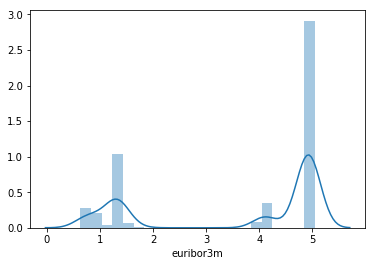

In [138]:
sns.distplot(loan['euribor3m'])
plt.show()

In [139]:
loan['euribor3m'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
95%          4.966000
99%          4.968000
max          5.045000
Name: euribor3m, dtype: float64

#### Number of employeees

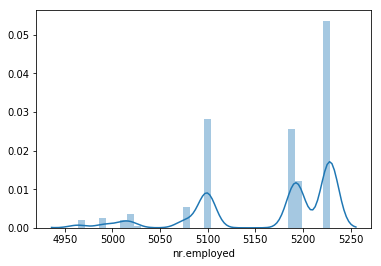

In [140]:
sns.distplot(loan['nr.employed'])
plt.show()

In [141]:
loan['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [142]:
loan['nr.employed'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
95%       5228.100000
99%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

Now that we have completed basic exploratory analysis, we can move to the next stage, that is data cleaning and data preparation

#### Data Preparation

Once Exploratory Data anlysis has been performed, we move to data preparation for the purpose of modelling.

In [143]:
# inspect the columns

loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

In [144]:
# Droping the column age_bins we had created for the purpose of data visualisation

loan.drop(columns = 'age_bins', inplace = True)

In [145]:
# Creating a dummy variable for the variable 'job' and dropping the first one.

job = pd.get_dummies(loan['job'],prefix='job',drop_first=True)

#Adding the results to the master dataframe

loan = pd.concat([loan,job],axis=1)

In [146]:
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


Notice that we have created a set of dummy columns for the feature job. Similarly, we are going to do the same for other categorical variables.

In [147]:
# Creating dummy variable for marital column

marital = pd.get_dummies(loan['marital'],prefix='marital',drop_first=True)
loan = pd.concat([loan,marital],axis=1)

In [148]:
# Creating dummy variable for education column

education = pd.get_dummies(loan['education'],prefix='education',drop_first=True)
loan = pd.concat([loan,education],axis=1)

In [149]:
# Creating dummy variable for default column

default = pd.get_dummies(loan['default'],prefix='default',drop_first=True)
loan = pd.concat([loan,default],axis=1)

In [150]:
# Creating dummy variable for housing column

housing = pd.get_dummies(loan['housing'],prefix='housing',drop_first=True)
loan = pd.concat([loan,housing],axis=1)

In [151]:
# Creating dummy variable for loan column

loan_v= pd.get_dummies(loan['loan'],prefix='loan',drop_first=True)
loan = pd.concat([loan,loan_v],axis=1)

In [152]:
# Creating dummy variable for contact column

contact = pd.get_dummies(loan['contact'],prefix='contact',drop_first=True)
loan = pd.concat([loan,contact],axis=1)

In [153]:
# Creating dummy variable for month column

month = pd.get_dummies(loan['month'],prefix='month',drop_first=True)
loan = pd.concat([loan,month],axis=1)

In [154]:
# Creating dummy variable for day_of_week column

day_of_week = pd.get_dummies(loan['day_of_week'],prefix='day_of_week',drop_first=True)
loan = pd.concat([loan,day_of_week],axis=1)

In [155]:
# Creating dummy variable for pdays column

pdays = pd.get_dummies(loan['pdays'],prefix='pdays',drop_first=True)
loan = pd.concat([loan,pdays],axis=1)

In [156]:
# Creating dummy variable for previous column

previous = pd.get_dummies(loan['previous'],prefix='previous',drop_first=True)
loan = pd.concat([loan,previous],axis=1)

In [157]:
# Creating dummy variable for poutcome column

poutcome = pd.get_dummies(loan['poutcome'],prefix='poutcome',drop_first=True)
loan = pd.concat([loan,poutcome],axis=1)

In [158]:
# inspect the dataframe

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More_than_3_times,previous_Never_contacted,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0


In [159]:
# Drop all features for whom dummy variable has been created

loan.drop(columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','pdays','previous','poutcome'], inplace=True)

In [160]:
loan.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More_than_3_times,previous_Never_contacted,poutcome_nonexistent,poutcome_success
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0


In [161]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

In [162]:
# Putting feature variable to X
X = loan.drop(['response'],axis=1)

# Putting response variable to y
y = loan['response']

In [163]:
# Splitting the data into train and test
X_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [164]:
# Splitting the data into train and test
X_train_orig, x_test_orig, y_train_orig, y_test_orig = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#### Standardisation

In [165]:
X_train.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More_than_3_times,previous_Never_contacted,poutcome_nonexistent,poutcome_success
7019,31,102,4,1.1,93.994,-36.4,4.860,5191.0,0,0,...,0,1,0,0,0,1,0,1,1,0
27175,51,218,3,-0.1,93.200,-42.0,4.021,5195.8,0,0,...,0,0,0,0,0,1,0,1,1,0
15817,39,333,3,1.4,93.918,-42.7,4.960,5228.1,0,0,...,1,0,0,0,0,1,0,1,1,0
40971,68,130,4,-1.1,94.601,-49.5,1.000,4963.6,0,0,...,1,0,0,0,0,1,0,0,0,0
8467,37,267,3,1.4,94.465,-41.8,4.864,5228.1,0,0,...,0,0,1,0,0,1,0,1,1,0


In [166]:
# Standardisation continuous features for X_train
X_train_df = X_train[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [167]:
std_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

In [168]:
X_train = X_train.drop(['age','duration','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [169]:
X_train = pd.concat([X_train,std_X_train_df],axis=1)

In [170]:
X_train = X_train.drop(['contact_telephone', 'default_unknown'],1)

In [171]:
X_train.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never_contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7019,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.877019,0.646930,0.649758,0.723298,0.891826,0.715448,0.333618
27175,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1.084499,0.213946,-0.114599,-0.650827,-0.319720,0.231937,0.400051
15817,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.092412,0.213946,0.840847,0.591769,-0.471164,0.773077,0.847088
40971,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2.751789,0.646930,-0.751563,1.773794,-1.942327,-1.509050,-2.813633
8467,0,0,0,0,0,0,0,0,1,0,...,1,1,0,-0.288564,0.213946,0.840847,1.538427,-0.276451,0.717753,0.847088


In [172]:
# Standardisation continuous features for X_test
X_test_df = x_test[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [173]:
std_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()

In [174]:
X_test = x_test.drop(['age','duration','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [175]:
X_test = pd.concat([X_test,std_X_test_df],axis=1)

In [176]:
X_test = X_test.drop(['contact_telephone', 'default_unknown'],1)

In [177]:
X_test.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never_contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33148,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-1.182984,-0.651460,-1.199007,-1.172918,-1.237193,-1.348603,-0.944859
27585,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0.100062,0.663413,-0.118526,-0.644728,-0.332420,0.226981,0.393573
15722,1,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.590809,-0.651460,0.834840,0.590583,-0.483215,0.768913,0.840640
40349,0,0,0,0,0,0,0,0,0,0,...,0,0,1,-1.182984,-0.213169,-1.135450,0.778116,0.464642,-1.574841,-2.432774
2576,0,0,0,0,0,0,1,0,0,0,...,1,1,0,1.481803,-0.213169,0.644167,0.721340,0.873944,0.708890,0.327136


In [178]:
print(X_test.shape) 
print(y_test.shape) 
print(X_train.shape)
print(y_train.shape)

(12357, 48)
(12357,)
(28831, 48)
(28831,)


In [179]:
import statsmodels.api as sm

### Modelling

Now that the data preparation step is complete, we will jump straight into modelling
We will look at three different models

- Logistic Regression
- Decision Tree
- Random Forests

#### Logistic Regression

In [180]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [181]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28784
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 Nov 2019   Deviance:                          nan
Time:                        09:57:48   Pearson chi2:                 2.89e+04
No. Iterations:                   100   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.8939      0.282     -6.720      0.000      -2.446      -1.341
job_blue-collar                    -0.1909      0.082     -2.330      0.020      -0.351      -0.030
job_entrepreneur                   -0.2532      0.132     -1.923      0.054      -0.511       0.005
job_housemaid                       0.0045      0.147      0.031      0.975      -0.283       0.292
job_management                     -0.1635      0.091     -1.789      0.074      -0.343       0.016
job_retired                         0.2404      0.109      2.205      0.027       0.027       0.454
job_self-employed                  -0.0781      0.121     -0.648      0.517      -0.314       0.158
job_services                       -0.0827      0.088     -0.944      0.345      -0.254       0.089
job_student                         0.2363      0.118      1.997      0.046       0.004       0.468
job_technician                     -0.0153      0.075     -0.205      0.837      -0.161       0.131
job_unemployed                     -0.0530      0.133     -0.398      0.691      -0.314       0.208
job_unknown                        -0.1379      0.238     -0.580      0.562      -0.604       0.328
marital_married                     0.0496      0.071      0.696      0.486      -0.090       0.189
marital_single                      0.1204      0.081      1.478      0.139      -0.039       0.280
education_Secondary_Education       0.0466      0.072      0.652      0.515      -0.094       0.187
education_Tertiary_Education        0.1466      0.072      2.025      0.043       0.005       0.288
education_professional.course       0.0962      0.085      1.128      0.259      -0.071       0.263
education_unknown                   0.1926      0.107      1.794      0.073      -0.018       0.403
default_yes                     -1.964e+12   4.75e+07  -4.14e+04      0.000   -1.96e+12   -1.96e+12
housing_unknown                  7.355e+04      1.778   4.14e+04      0.000    7.36e+04    7.36e+04
housing_yes                        -0.0320      0.043     -0.745      0.456      -0.116       0.052
loan_unknown                    -7.355e+04      1.778  -4.14e+04      0.000   -7.36e+04   -7.36e+04
loan_yes                            0.0073      0.059      0.123      0.902      -0.108       0.123
month_aug                           0.4669      0.127      3.688      0.000       0.219       0.715
month_dec                           0.2432      0.224      1.087      0.277      -0.195       0.682
month_jul                           0.2338      0.094      2.480      0.013       0.049       0.419
month_jun                          -0.4804      0.127     -3.773      0.000      -0.730      -0.231
month_mar                           1.2518      0.150      8.347      0.000       0.958       1.546
month_may                          -0.5816      0.083     -6.9

In [183]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [184]:
rfe.support_

array([False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
        True,  True,  True, False,  True, False, False,  True,  True,
       False,  True, False])

In [185]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('job_blue-collar', False, 7),
 ('job_entrepreneur', False, 6),
 ('job_housemaid', False, 34),
 ('job_management', False, 9),
 ('job_retired', True, 1),
 ('job_self-employed', False, 19),
 ('job_services', False, 16),
 ('job_student', True, 1),
 ('job_technician', False, 30),
 ('job_unemployed', False, 23),
 ('job_unknown', False, 13),
 ('marital_married', False, 24),
 ('marital_single', False, 20),
 ('education_Secondary_Education', False, 25),
 ('education_Tertiary_Education', False, 11),
 ('education_professional.course', False, 22),
 ('education_unknown', False, 10),
 ('default_yes', False, 28),
 ('housing_unknown', False, 21),
 ('housing_yes', False, 27),
 ('loan_unknown', False, 26),
 ('loan_yes', False, 33),
 ('month_aug', True, 1),
 ('month_dec', False, 3),
 ('month_jul', False, 4),
 ('month_jun', True, 1),
 ('month_mar', True, 1),
 ('month_may', True, 1),
 ('month_nov', True, 1),
 ('month_oct', False, 18),
 ('month_sep', False, 2),
 ('day_of_week_mon', True, 1),
 ('day_of_wee

In [186]:
col = X_train.columns[rfe.support_]

In [187]:
col

Index(['job_retired', 'job_student', 'month_aug', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'day_of_week_mon',
       'pdays_First_time_contacted', 'previous_More_than_3_times',
       'previous_Never_contacted', 'poutcome_success', 'emp.var.rate',
       'cons.price.idx', 'euribor3m'],
      dtype='object')

In [188]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28815
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8011.8
Date:                Mon, 11 Nov 2019   Deviance:                       16024.
Time:                        09:58:00   Pearson chi2:                 2.87e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5567      0.216     -7.196      0.000      -1.981      -1.133
job_retired                    0.2845      0.083      3.436      0.001       0.122       0.447
job_student                    0.3335      0.104      3.194      0.001       0.129       0.538
month_aug                      0.4315      0.078      5.528      0.000       0.279       0.585
month_jun                     -0.6310      0.080     -7.853      0.000      -0.789      -0.474
month_mar                      1.1780      0.117     10.103      0.000       0.949       1.407
month_may                     -0.7302      0.057    -12.783      0.000      -0.842      -0.618
month_nov                     -0.4616      0.085     -5.457      0.000      -0.627      -0.296
day_of_week_mon               -0.3249      0.054     -6.001      0.000      -0.431      -0.219
pdays_First_time_contacted    -1.0374      0.217     -4.776      0.000      -1.463      -0.612
previous_More_than_3_times    -0.2348      0.282     -0.831      0.406      -0.788       0.319
previous_Never_contacted       0.4484      0.067      6.727      0.000       0.318       0.579
poutcome_success               0.8540      0.219      3.900      0.000       0.425       1.283
emp.var.rate                  -1.9588      0.136    -14.382      0.000      -2.226      -1.692
cons.price.idx                 0.7773      0.050     15.454      0.000       0.679       0.876
euribor3m                      0.5774      0.112      5.166      0.000       0.358       0.796
==============================================================================================
"""

In [189]:
X_train_sm = sm.add_constant(X_train[col].drop(['previous_More_than_3_times'],1))
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28816
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8012.2
Date:                Mon, 11 Nov 2019   Deviance:                       16024.
Time:                        09:58:00   Pearson chi2:                 2.87e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5871      0.213     -7.439      0.000      -2.005      -1.169
job_retired                    0.2848      0.083      3.440      0.001       0.123       0.447
job_student                    0.3305      0.104      3.166      0.002       0.126       0.535
month_aug                      0.4282      0.078      5.493      0.000       0.275       0.581
month_jun                     -0.6304      0.080     -7.846      0.000      -0.788      -0.473
month_mar                      1.1781      0.117     10.105      0.000       0.950       1.407
month_may                     -0.7305      0.057    -12.789      0.000      -0.842      -0.619
month_nov                     -0.4656      0.084     -5.512      0.000      -0.631      -0.300
day_of_week_mon               -0.3249      0.054     -6.001      0.000      -0.431      -0.219
pdays_First_time_contacted    -1.0067      0.214     -4.700      0.000      -1.426      -0.587
previous_Never_contacted       0.4489      0.067      6.736      0.000       0.318       0.580
poutcome_success               0.8774      0.217      4.036      0.000       0.451       1.303
emp.var.rate                  -1.9603      0.136    -14.396      0.000      -2.227      -1.693
cons.price.idx                 0.7747      0.050     15.432      0.000       0.676       0.873
euribor3m                      0.5809      0.112      5.202      0.000       0.362       0.800
==============================================================================================
"""

In [190]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [191]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,288.63
12,emp.var.rate,60.35
14,euribor3m,39.70
9,pdays_First_time_contacted,10.45
11,poutcome_success,9.91
13,cons.price.idx,8.61
3,month_aug,2.17
4,month_jun,1.94
7,month_nov,1.72
10,previous_Never_contacted,1.64


In [192]:
X_train_sm = sm.add_constant(X_train[col].drop(['previous_More_than_3_times','emp.var.rate'],1))
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28817
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8110.2
Date:                Mon, 11 Nov 2019   Deviance:                       16220.
Time:                        09:58:02   Pearson chi2:                 3.03e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.4492      0.212     -6.838      0.000      -1.865      -1.034
job_retired                    0.4076      0.081      5.015      0.000       0.248       0.567
job_student                    0.4155      0.103      4.033      0.000       0.214       0.617
month_aug                      0.0501      0.071      0.702      0.483      -0.090       0.190
month_jun                     -0.0441      0.070     -0.632      0.527      -0.181       0.093
month_mar                      0.7899      0.115      6.866      0.000       0.564       1.015
month_may                     -0.9654      0.056    -17.301      0.000      -1.075      -0.856
month_nov                     -0.0825      0.079     -1.044      0.297      -0.238       0.072
day_of_week_mon               -0.3282      0.054     -6.121      0.000      -0.433      -0.223
pdays_First_time_contacted    -1.1659      0.213     -5.483      0.000      -1.583      -0.749
previous_Never_contacted       0.4667      0.065      7.140      0.000       0.339       0.595
poutcome_success               0.8156      0.216      3.780      0.000       0.393       1.239
cons.price.idx                 0.1548      0.026      5.992      0.000       0.104       0.205
euribor3m                     -0.9825      0.029    -33.417      0.000      -1.040      -0.925
==============================================================================================
"""

In [193]:
X_train_sm = sm.add_constant(X_train[col].drop(['previous_More_than_3_times','emp.var.rate','month_jun'],1))
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28818
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8110.4
Date:                Mon, 11 Nov 2019   Deviance:                       16221.
Time:                        09:58:02   Pearson chi2:                 3.03e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.4586      0.211     -6.899      0.000      -1.873      -1.044
job_retired                    0.4097      0.081      5.045      0.000       0.251       0.569
job_student                    0.4157      0.103      4.036      0.000       0.214       0.618
month_aug                      0.0591      0.070      0.845      0.398      -0.078       0.196
month_mar                      0.7986      0.114      6.991      0.000       0.575       1.022
month_may                     -0.9557      0.054    -17.786      0.000      -1.061      -0.850
month_nov                     -0.0729      0.078     -0.939      0.348      -0.225       0.079
day_of_week_mon               -0.3283      0.054     -6.124      0.000      -0.433      -0.223
pdays_First_time_contacted    -1.1675      0.213     -5.491      0.000      -1.584      -0.751
previous_Never_contacted       0.4652      0.065      7.124      0.000       0.337       0.593
poutcome_success               0.8130      0.216      3.769      0.000       0.390       1.236
cons.price.idx                 0.1515      0.025      5.989      0.000       0.102       0.201
euribor3m                     -0.9827      0.029    -33.387      0.000      -1.040      -0.925
==============================================================================================
"""

In [194]:
X_train_sm = sm.add_constant(X_train[col].drop(['previous_More_than_3_times','emp.var.rate','month_jun','month_aug'],1))
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28819
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8110.8
Date:                Mon, 11 Nov 2019   Deviance:                       16222.
Time:                        09:58:02   Pearson chi2:                 3.04e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.4302      0.209     -6.856      0.000      -1.839      -1.021
job_retired                    0.4127      0.081      5.088      0.000       0.254       0.572
job_student                    0.4194      0.103      4.080      0.000       0.218       0.621
month_mar                      0.7872      0.113      6.942      0.000       0.565       1.009
month_may                     -0.9690      0.051    -18.870      0.000      -1.070      -0.868
month_nov                     -0.0913      0.074     -1.227      0.220      -0.237       0.055
day_of_week_mon               -0.3290      0.054     -6.140      0.000      -0.434      -0.224
pdays_First_time_contacted    -1.1800      0.212     -5.567      0.000      -1.595      -0.765
previous_Never_contacted       0.4634      0.065      7.103      0.000       0.336       0.591
poutcome_success               0.8068      0.215      3.745      0.000       0.385       1.229
cons.price.idx                 0.1432      0.023      6.136      0.000       0.097       0.189
euribor3m                     -0.9746      0.028    -35.022      0.000      -1.029      -0.920
==============================================================================================
"""

In [195]:
X_train_sm = sm.add_constant(X_train[col].drop(['previous_More_than_3_times','emp.var.rate','month_jun','month_aug','month_nov'],1))
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28820
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8111.5
Date:                Mon, 11 Nov 2019   Deviance:                       16223.
Time:                        09:58:02   Pearson chi2:                 3.04e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.4581      0.207     -7.032      0.000      -1.865      -1.052
job_retired                    0.4147      0.081      5.113      0.000       0.256       0.574
job_student                    0.4209      0.103      4.092      0.000       0.219       0.622
month_mar                      0.7974      0.113      7.049      0.000       0.576       1.019
month_may                     -0.9567      0.050    -18.982      0.000      -1.055      -0.858
day_of_week_mon               -0.3289      0.054     -6.136      0.000      -0.434      -0.224
pdays_First_time_contacted    -1.1710      0.212     -5.528      0.000      -1.586      -0.756
previous_Never_contacted       0.4696      0.065      7.226      0.000       0.342       0.597
poutcome_success               0.8146      0.215      3.783      0.000       0.393       1.237
cons.price.idx                 0.1491      0.023      6.528      0.000       0.104       0.194
euribor3m                     -0.9811      0.027    -35.930      0.000      -1.035      -0.928
==============================================================================================
"""

In [196]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,280.78
6,pdays_First_time_contacted,10.32
8,poutcome_success,9.89
10,euribor3m,2.51
9,cons.price.idx,1.98
7,previous_Never_contacted,1.60
4,month_may,1.06
3,month_mar,1.04
2,job_student,1.03
1,job_retired,1.02


In [197]:
X_train_sm = sm.add_constant(X_train[col].drop(['previous_More_than_3_times','emp.var.rate','month_jun','month_aug','month_nov', 'pdays_First_time_contacted'],1))
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28821
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8126.3
Date:                Mon, 11 Nov 2019   Deviance:                       16253.
Time:                        09:58:03   Pearson chi2:                 3.05e+04
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.5546      0.064    -40.186      0.000      -2.679      -2.430
job_retired                  0.4168      0.081      5.149      0.000       0.258       0.576
job_student                  0.4515      0.102      4.417      0.000       0.251       0.652
month_mar                    0.7995      0.113      7.089      0.000       0.578       1.021
month_may                   -0.9677      0.050    -19.222      0.000      -1.066      -0.869
day_of_week_mon             -0.3288      0.054     -6.140      0.000      -0.434      -0.224
previous_Never_contacted     0.3952      0.063      6.318      0.000       0.273       0.518
poutcome_success             1.9027      0.090     21.210      0.000       1.727       2.079
cons.price.idx               0.1579      0.023      6.937      0.000       0.113       0.202
euribor3m                   -0.9896      0.027    -36.338      0.000      -1.043      -0.936
============================================================================================
"""

In [198]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,12.23
9,euribor3m,2.50
8,cons.price.idx,1.96
6,previous_Never_contacted,1.57
7,poutcome_success,1.33
4,month_may,1.06
3,month_mar,1.04
2,job_student,1.03
1,job_retired,1.02
5,day_of_week_mon,1.00


In [199]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [200]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

In [201]:
y_train_pred_final['Prospect_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_ID
0,0,0.023640,7019
1,0,0.076445,27175
2,0,0.040704,15817
3,0,0.333326,40971
4,0,0.067431,8467


In [202]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_ID,predicted
0,0,0.023640,7019,0
1,0,0.076445,27175,0
2,0,0.040704,15817,0
3,0,0.333326,40971,0
4,0,0.067431,8467,0


In [203]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[25277   296]
 [ 2600   658]]


In [204]:
cols_logreg = X_train_sm.columns
cols_logreg = cols_logreg.drop(['const'],1)
cols_logreg

Index(['job_retired', 'job_student', 'month_mar', 'month_may',
       'day_of_week_mon', 'previous_Never_contacted', 'poutcome_success',
       'cons.price.idx', 'euribor3m'],
      dtype='object')

In [205]:
X_test_sm = sm.add_constant(X_test[cols_logreg])

In [206]:
y_test_pred = res.predict(X_test_sm).values.reshape(-1)

In [207]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})

In [208]:
y_test_pred_final['Prospect_ID'] = y_test.index
y_test_pred_final.head()

,Converted,Converted_Prob,Prospect_ID
0,0,0.121574,33148
1,0,0.076860,27585
2,0,0.040858,15722
3,1,0.736814,40349
4,0,0.023783,2576


In [209]:
y_test_pred_final['predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_test_pred_final.head()

,Converted,Converted_Prob,Prospect_ID,predicted
0,0,0.121574,33148,0
1,0,0.076860,27585,0
2,0,0.040858,15722,0
3,1,0.736814,40349,1
4,0,0.023783,2576,0


In [210]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted )
print(confusion)

[[10838   137]
 [ 1103   279]]


In [211]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted))

0.8996520190984867


In [212]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[1,0] # false positives
FN = confusion[0,1] # false negatives
print("Sensitivity : ",(TP / float(TP+FN)))
print("Specificity : ", (TN / float(TN+FP)))
print("Positive Rate: ",(FP/ float(TN+FP)))
print("Positive Predictive Rate : ",(TP / float(TP+FP)))
print("Negative Predictive Value : ",(TN / float(TN+ FN)))
print("Accuracy : ", ((TP+TN ) / float(TP+TN+FP+FN)))
print("Recall : ", ((TP ) / float(TP+FN)))
print("Precision : ", ((TP) / float(TP+FP)))

Sensitivity :  0.9875170842824601
Specificity :  0.20188133140376266
Positive Rate:  0.7981186685962374
Positive Predictive Rate :  0.9076291767858639
Negative Predictive Value :  0.6706730769230769
Accuracy :  0.8996520190984867
Recall :  0.9875170842824601
Precision :  0.9076291767858639


In [213]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

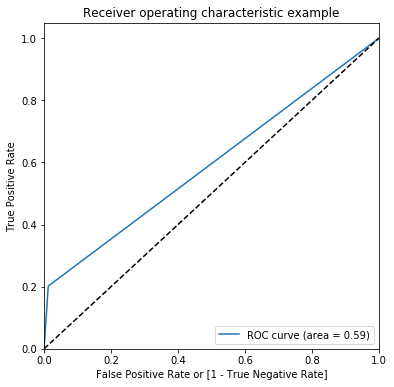

(array([0.        , 0.01248292, 1.        ]),
 array([0.        , 0.20188133, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [214]:
draw_roc(y_test_pred_final.Converted, y_test_pred_final.predicted)

In [215]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

,Converted,Converted_Prob,Prospect_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.121574,33148,0,1,1,0,0,0,0,0,0,0,0
1,0,0.076860,27585,0,1,0,0,0,0,0,0,0,0,0
2,0,0.040858,15722,0,1,0,0,0,0,0,0,0,0,0
3,1,0.736814,40349,1,1,1,1,1,1,1,1,1,0,0
4,0,0.023783,2576,0,1,0,0,0,0,0,0,0,0,0


In [216]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test, y_test_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.111839  1.000000  0.000000
0.1   0.1  0.764101  0.659913  0.777221
0.2   0.2  0.844137  0.580318  0.877358
0.3   0.3  0.888322  0.387120  0.951435
0.4   0.4  0.897953  0.256151  0.978770
0.5   0.5  0.899652  0.201881  0.987517
0.6   0.6  0.898195  0.164978  0.990524
0.7   0.7  0.895444  0.097685  0.995900
0.8   0.8  0.890912  0.032562  0.998998
0.9   0.9  0.888484  0.002894  1.000000


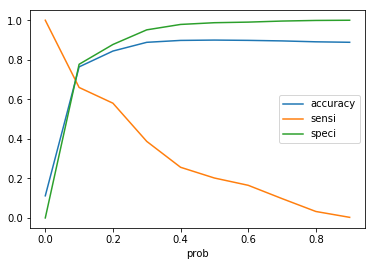

In [217]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# We need higher sensitivity here. Targeted audience actually respond

In [218]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_test_pred_final.head()

,Converted,Converted_Prob,Prospect_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.121574,33148,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.076860,27585,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.040858,15722,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.736814,40349,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.023783,2576,0,1,0,0,0,0,0,0,0,0,0,0


In [219]:
print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted))

0.897952577486445


In [220]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
print(confusion)

[[10742   233]
 [ 1028   354]]


In [221]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[1,0] # false positives
FN = confusion[0,1] # false negatives
print("Sensitivity : ",(TP / float(TP+FN)))
print("Specificity : ", (TN / float(TN+FP)))
print("Positive Rate: ",(FP/ float(TN+FP)))
print("Positive Predictive Rate : ",(TP / float(TP+FP)))
print("Negative Predictive Value : ",(TN / float(TN+ FN)))
print("Accuracy : ", ((TP+TN ) / float(TP+TN+FP+FN)))
print("Recall : ", ((TP ) / float(TP+FN)))
print("Precision : ", ((TP) / float(TP+FP)))

Sensitivity :  0.9787699316628702
Specificity :  0.25615050651230103
Positive Rate:  0.743849493487699
Positive Predictive Rate :  0.912659303313509
Negative Predictive Value :  0.6030664395229983
Accuracy :  0.897952577486445
Recall :  0.9787699316628702
Precision :  0.912659303313509


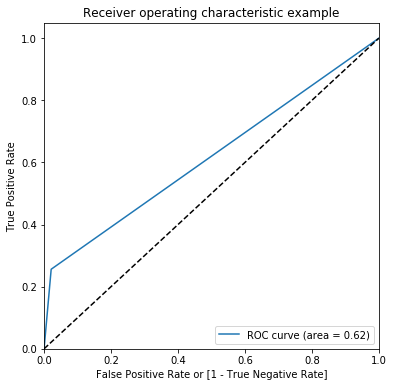

(array([0.        , 0.02123007, 1.        ]),
 array([0.        , 0.25615051, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [222]:
draw_roc(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

In [223]:
X_train_sm.columns

Index(['const', 'job_retired', 'job_student', 'month_mar', 'month_may',
       'day_of_week_mon', 'previous_Never_contacted', 'poutcome_success',
       'cons.price.idx', 'euribor3m'],
      dtype='object')

In [224]:
#observation1 : The important variables are ['const', 'job_student', 'month_mar', 'month_may', 'month_nov','day_of_week_mon', 'previous_Never_contacted', 'poutcome_success']
#Observation2 : The important variables are ['job_blue-collar', 'job_entrepreneur', 'job_retired', 'job_student','month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar','month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_success']
#Observation3 : The important variables are ['const', 'job_retired', 'job_student', 'month_mar', 'month_may','day_of_week_mon', 'previous_Never_contacted', 'poutcome_success','cons.price.idx', 'euribor3m']   

#### Principal Component Analysis

In [225]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [226]:
pca = PCA()
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [227]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      33.49
1      44.64
2      53.79
3      62.22
4      67.55
5      70.82
6      73.44
7      75.78
8      78.03
9      80.03
10     81.95
11     83.84
12     85.69
13     87.51
14     89.20
15     90.58
16     91.77
17     92.82
18     93.57
19     94.26
20     94.87
21     95.41
22     95.94
23     96.41
24     96.84
25     97.25
26     97.60
27     97.92
28     98.23
29     98.51
30     98.77
31     98.99
32     99.17
33     99.34
34     99.49
35     99.61
36     99.72
37     99.79
38     99.85
39     99.89
40     99.92
41     99.95
42     99.97
43     99.99
44    100.00
45    100.00
46    100.00
47    100.00
dtype: float64


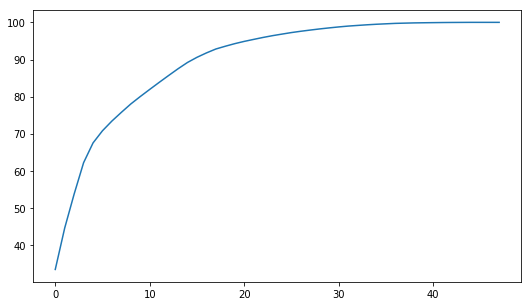

In [228]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [229]:
# create pipeline
PCA_VARS = 22
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [230]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8159966702507717

In [231]:
X_train.columns

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_Secondary_Education',
       'education_Tertiary_Education', 'education_professional.course',
       'education_unknown', 'default_yes', 'housing_unknown', 'housing_yes',
       'loan_unknown', 'loan_yes', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'pdays_Contacted_in_first_10days',
       'pdays_First_time_contacted', 'previous_More_than_3_times',
       'previous_Never_contacted', 'poutcome_nonexistent', 'poutcome_success',
       'age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='objec

In [232]:
X_test.columns

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_Secondary_Education',
       'education_Tertiary_Education', 'education_professional.course',
       'education_unknown', 'default_yes', 'housing_unknown', 'housing_yes',
       'loan_unknown', 'loan_yes', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'pdays_Contacted_in_first_10days',
       'pdays_First_time_contacted', 'previous_More_than_3_times',
       'previous_Never_contacted', 'poutcome_nonexistent', 'poutcome_success',
       'age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='objec

In [233]:
print(X_test.shape) #(12357, 48)
print(y_test.shape) #(12357,)
print(X_train.shape)
print(y_train.shape)


(12357, 48)
(12357,)
(28831, 48)
(28831,)


In [234]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[9127 1848]
 [ 523  859]]
Sensitivity: 	0.62
Specificity: 	0.83
AUC:    	 0.78


In [235]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.886997
1    0.113003
Name: response, dtype: float64

In [236]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [21,22,23,24,25,26], 'logistic__C': [0.01,0.02,0.03,0.04,0.05], 'logistic__penalty': ['l1','l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='recall')

In [237]:
# fit model
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=Tr...
                                                           multi_class='warn',
                    

In [238]:
# print best hyperparameters
print("Best Recall: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best Recall:  0.669732753398793
Best hyperparameters:  {'logistic__C': 0.01, 'logistic__penalty': 'l1', 'pca__n_components': 21}


In [239]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

# Old
#[[9087 1888]
# [ 517  865]]
#Sensitivity: 	0.63
#Specificity: 	0.83
#AUC:    	 0.78

# new sensitivity = .64


[[8787 2188]
 [ 498  884]]
Sensitivity: 	0.64
Specificity: 	0.8
AUC:    	 0.77


In [240]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     10975
           1       0.29      0.64      0.40      1382

    accuracy                           0.78     12357
   macro avg       0.62      0.72      0.63     12357
weighted avg       0.87      0.78      0.81     12357



In [241]:
#pcaT = np.transpose(churn_pca)
#pcaT.shape
#df_pca_out = pd.DataFrame({'PC1':pcaT[0], 'PC2':pcaT[1], 'PC3':pcaT[2], 'PC4':pcaT[3], 'PC5':pcaT[4],'PC6':pcaT[5], 'PC7':pcaT[6], 'PC8':pcaT[7], 'PC9':pcaT[8], 'PC10':pcaT[9],'PC11':pcaT[10], 'PC12':pcaT[11], 'PC13':pcaT[12], 'PC14':pcaT[13], 'PC15':pcaT[14],'PC16':pcaT[15], 'PC17':pcaT[16], 'PC18':pcaT[17], 'PC19':pcaT[18], 'PC20':pcaT[19],'PC21':pcaT[20], 'PC22':pcaT[21], 'PC23':pcaT[22], 'PC24':pcaT[23], 'PC25':pcaT[24],'PC26':pcaT[25], 'PC27':pcaT[26], 'PC28':pcaT[27], 'PC29':pcaT[28], 'PC30':pcaT[29],'PC31':pcaT[30], 'PC32':pcaT[31], 'PC33':pcaT[32], 'PC34':pcaT[33], 'PC35':pcaT[34],'PC36':pcaT[35], 'PC37':pcaT[36], 'PC38':pcaT[37], 'PC39':pcaT[38], 'PC40':pcaT[39],'PC41':pcaT[40], 'PC42':pcaT[41], 'PC43':pcaT[42], 'PC44':pcaT[43], 'PC45':pcaT[44],'PC46':pcaT[45], 'PC47':pcaT[46], 'PC48':pcaT[47] })
#df_pca_out['column_names'] = 
#df_pca_out.head()

####  Decision Tree Classifier

In [242]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_orig, y_train_orig)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [243]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix

# Making predictions
y_pred_default = dt_default.predict(x_test_orig)

# Printing classification report
print(classification_report(y_test_orig, y_pred_default))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10975
           1       0.64      0.46      0.54      1382

    accuracy                           0.91     12357
   macro avg       0.79      0.72      0.75     12357
weighted avg       0.90      0.91      0.90     12357



In [244]:
# Printing confusion matrix
print(confusion_matrix(y_test_orig,y_pred_default))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_orig,y_pred_default, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

[[10620   355]
 [  740   642]]
Sensitivity: 	0.46
Specificity: 	0.97


In [245]:
x_test_orig.columns[0:] == X_train_orig.columns[0:] 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [246]:
X_train_orig.drop(['duration'], inplace=True , axis=1)
x_test_orig.drop(['duration'], inplace=True , axis=1)
#decile_df.drop(0, inplace=True, axis = 1)

Now we will try to tune the hyperparameters

- Maximum Depth
- Minimum Samples Leaf
- Minimum Samples Split
- Criterion

We will use gridsearchCV to tune the hyperparameters

In [247]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_orig,y_train_orig)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   18.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [248]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
#cv_results

In [249]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9001075231521626
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [250]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
clf_gini.fit(X_train_orig, y_train_orig)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [251]:
# accuracy score
clf_gini.score(x_test_orig,y_test_orig)

0.9008659059642308

In [252]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [253]:
# If you're on windows:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

In [254]:
len(list(x_test_orig.columns[0:])) 
#x_test_orig.columns[0:]

50

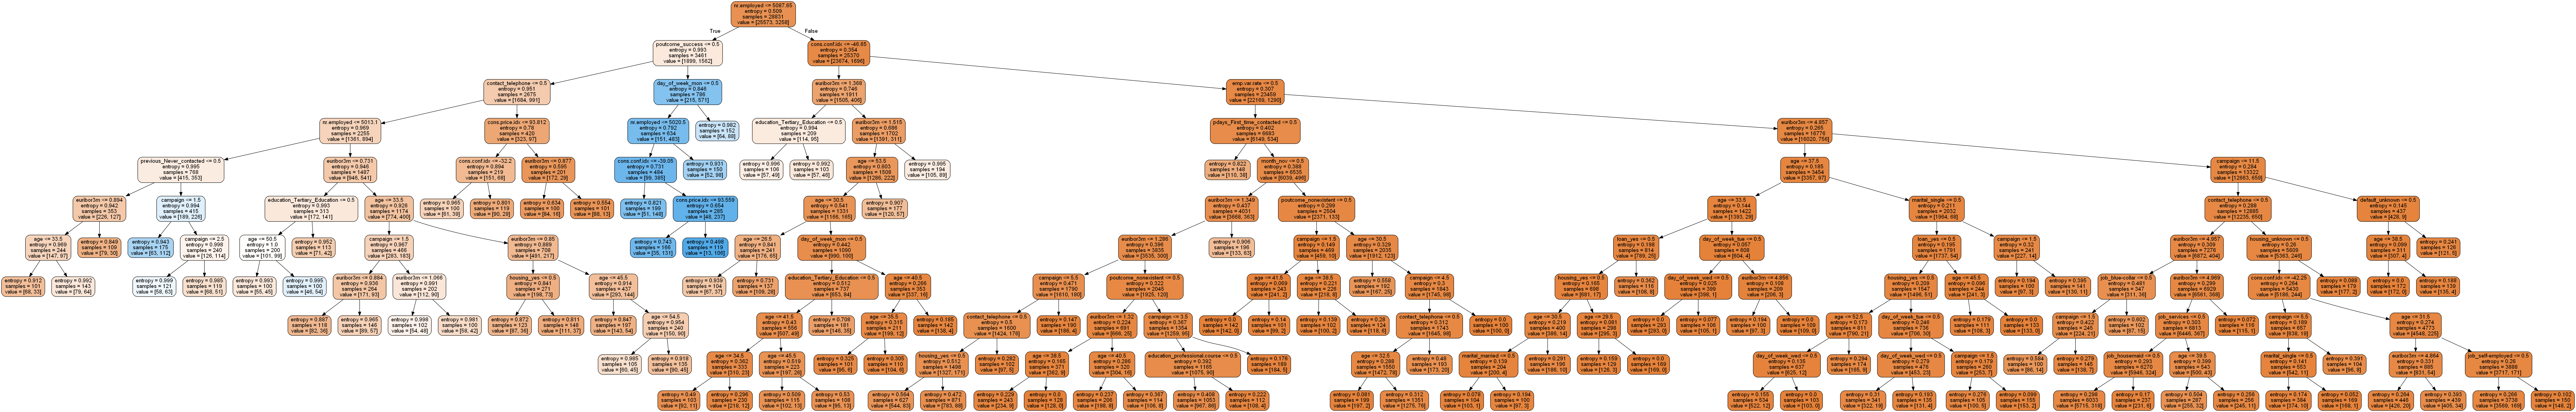

In [255]:
features = list(X_train_orig.columns[0:])
#features = list(X_train_orig.columns)
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data, feature_names=features, filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [256]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(x_test_orig)
print(classification_report(y_test_orig, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10975
           1       0.65      0.24      0.35      1382

    accuracy                           0.90     12357
   macro avg       0.78      0.61      0.65     12357
weighted avg       0.88      0.90      0.88     12357



In [257]:
# confusion matrix
print(confusion_matrix(y_test_orig,y_pred))

[[10795   180]
 [ 1045   337]]


In [258]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_orig, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.24
Specificity: 	0.98


In [259]:
confusion = metrics.confusion_matrix(y_test_orig,y_pred )
print(confusion)
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[1,0] # false positives
FN = confusion[0,1] # false negatives
print("Sensitivity : ",(TP / float(TP+FN)))
print("Specificity : ", (TN / float(TN+FP)))
print("Positive Rate: ",(FP/ float(TN+FP)))
print("Positive Predictive Rate : ",(TP / float(TP+FP)))
print("Negative Predictive Value : ",(TN / float(TN+ FN)))
print("Accuracy : ", ((TP+TN ) / float(TP+TN+FP+FN)))
print("Recall : ", ((TP ) / float(TP+FN)))
print("Precision : ", ((TP) / float(TP+FP)))

[[10795   180]
 [ 1045   337]]
Sensitivity :  0.9835990888382687
Specificity :  0.243849493487699
Positive Rate:  0.756150506512301
Positive Predictive Rate :  0.9117398648648649
Negative Predictive Value :  0.6518375241779497
Accuracy :  0.9008659059642308
Recall :  0.9835990888382687
Precision :  0.9117398648648649


In [260]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
clf_gini.fit(X_train_orig, y_train_orig)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [261]:
X_train_orig.columns[0:]

Index(['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_Secondary_Education', 'education_Tertiary_Education',
       'education_professional.course', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'pdays_Contacted_in_first_10days',
       'pdays_First_time_contacted', 'previous_More_than_3_times',
       'previous_Never_contacted', 'poutcome_nonexistent',

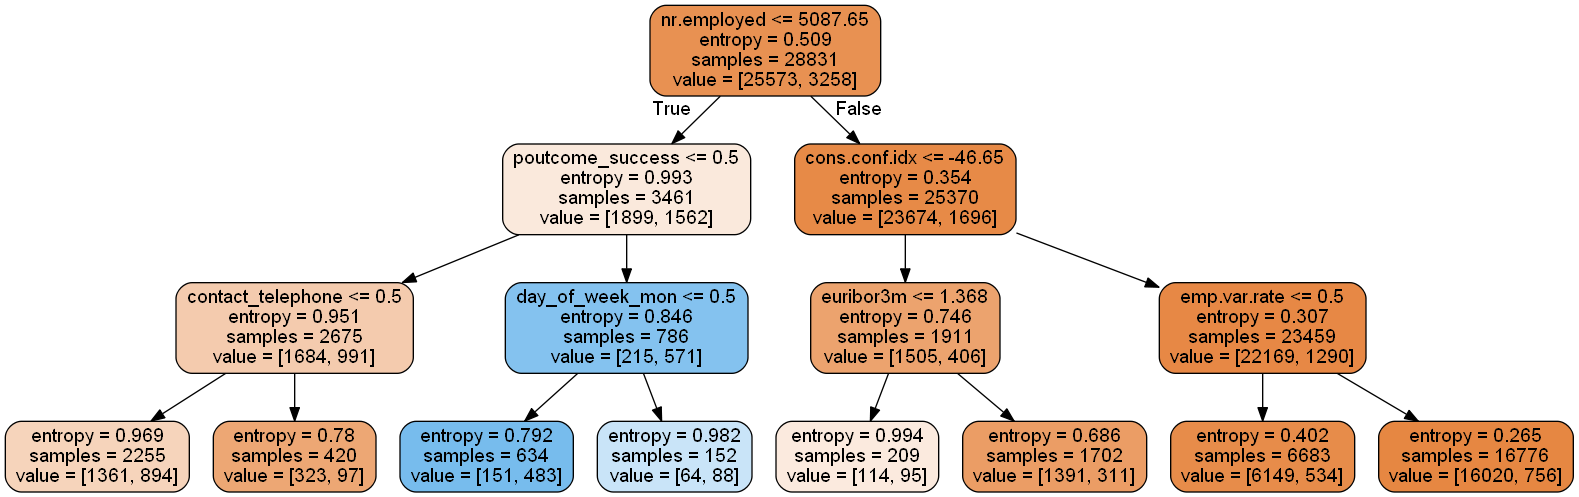

In [262]:
# plotting tree with max_depth=3
features = list(X_train_orig.columns[0:])
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Making the Decision Tree on the RFE

In [263]:
#rfe columns = ['job_retired', 'job_student', 'month_mar', 'month_may','day_of_week_mon', 'previous_Never_contacted', 'poutcome_success','cons.price.idx', 'euribor3m']
lst = list(X_train_sm.columns)
lst.remove('const')
X_train_sm_orig = X_train_orig[lst]
X_test_sm_orig = x_test_orig[lst]

In [264]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_sm_orig,y_train_orig)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [265]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8992057160695085
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [266]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train_sm_orig, y_train_orig)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [267]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test_sm_orig)
print(classification_report(y_test_orig, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10975
           1       0.64      0.22      0.33      1382

    accuracy                           0.90     12357
   macro avg       0.78      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357



In [268]:
# accuracy score
clf_gini.score(X_test_sm_orig,y_test_orig)

0.8993283159342883

In [269]:
confusion = metrics.confusion_matrix(y_test_orig, y_pred)
print(confusion)
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[1,0] # false positives
FN = confusion[0,1] # false negatives
print("Sensitivity : ",(TP / float(TP+FN)))
print("Specificity : ", (TN / float(TN+FP)))
print("Positive Rate: ",(FP/ float(TN+FP)))
print("Positive Predictive Rate : ",(TP / float(TP+FP)))
print("Negative Predictive Value : ",(TN / float(TN+ FN)))
print("Accuracy : ", ((TP+TN ) / float(TP+TN+FP+FN)))
print("Recall : ", ((TP ) / float(TP+FN)))
print("Precision : ", ((TP) / float(TP+FP)))

[[10805   170]
 [ 1074   308]]
Sensitivity :  0.984510250569476
Specificity :  0.22286541244573083
Positive Rate:  0.7771345875542692
Positive Predictive Rate :  0.9095883491876421
Negative Predictive Value :  0.6443514644351465
Accuracy :  0.8993283159342883
Recall :  0.984510250569476
Precision :  0.9095883491876421


In [270]:
# model with optimal hyperparameters
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train_sm_orig, y_train_orig)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [271]:
X_train_sm_orig.columns[0:]

Index(['job_retired', 'job_student', 'month_mar', 'month_may',
       'day_of_week_mon', 'previous_Never_contacted', 'poutcome_success',
       'cons.price.idx', 'euribor3m'],
      dtype='object')

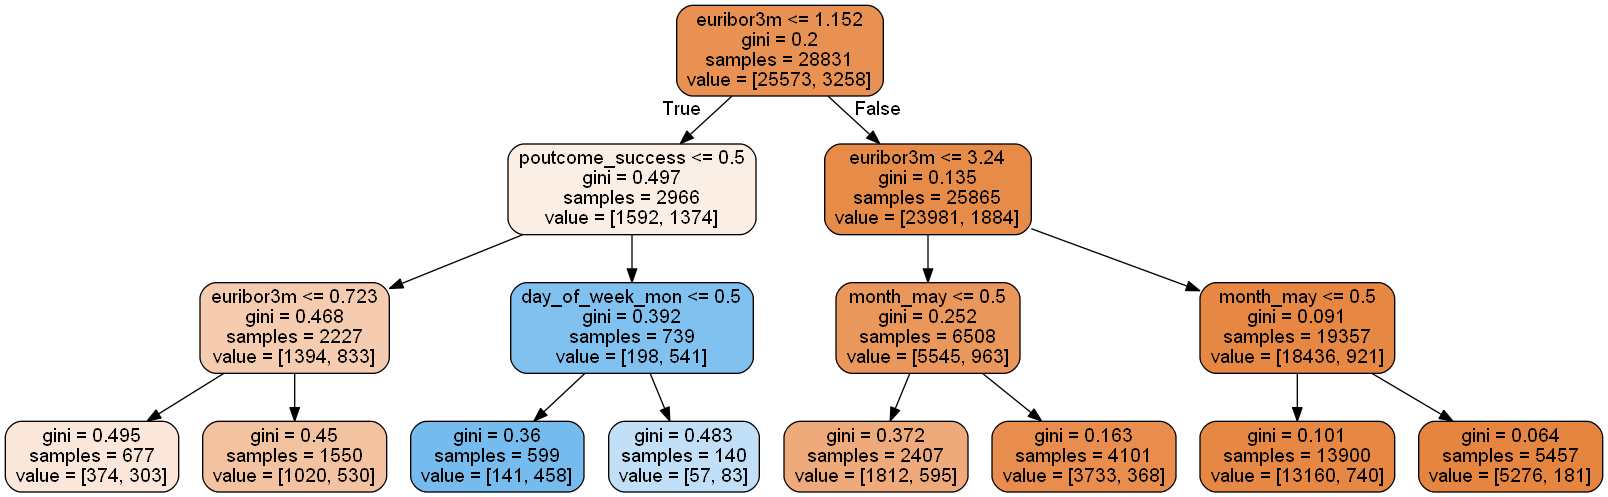

In [272]:
# plotting tree with max_depth=3
#features = range(X_test_sm_orig.shape[1])
features = list(X_train_sm_orig.columns[0:])
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


# Now that we have looked at Logistic Regression and Decision trees, we will look at Ensemble model that is Random Forest

#### Random Forest

In [273]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [274]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [275]:
# fit model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [276]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.669732753398793
Best hyperparameters:  {'logistic__C': 0.01, 'logistic__penalty': 'l1', 'pca__n_components': 21}


In [277]:
# predict churn on test data
y_pred = rfc.predict(X_test)

In [278]:
# Let's check the report of our default model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10975
           1       0.53      0.27      0.35      1382

    accuracy                           0.89     12357
   macro avg       0.72      0.62      0.65     12357
weighted avg       0.87      0.89      0.88     12357



In [279]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[10654   321]
 [ 1015   367]]


In [280]:
print(accuracy_score(y_test,y_pred))

0.8918831431577243


Once again, we are going to tune the hyperparameters

- Number of trees (estimators)
- Maximum Depth
- Minimum Samples leaf
- Minimum Samples Split
- Maximum features

In [281]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [282]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 11.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [283]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8997606742742187 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 300}


In [284]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200)

In [285]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [286]:
# predict
predictions = rfc.predict(X_test)

In [287]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10975
           1       0.70      0.18      0.28      1382

    accuracy                           0.90     12357
   macro avg       0.80      0.58      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [288]:
print(confusion_matrix(y_test,predictions))

[[10869   106]
 [ 1135   247]]


In [289]:
confusion = metrics.confusion_matrix(y_test,predictions)
print(confusion)
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[1,0] # false positives
FN = confusion[0,1] # false negatives
print("Sensitivity : ",(TP / float(TP+FN)))
print("Specificity : ", (TN / float(TN+FP)))
print("Positive Rate: ",(FP/ float(TN+FP)))
print("Positive Predictive Rate : ",(TP / float(TP+FP)))
print("Negative Predictive Value : ",(TN / float(TN+ FN)))
print("Accuracy : ", ((TP+TN ) / float(TP+TN+FP+FN)))
print("Recall : ", ((TP ) / float(TP+FN)))
print("Precision : ", ((TP) / float(TP+FP)))

[[10869   106]
 [ 1135   247]]
Sensitivity :  0.9903416856492028
Specificity :  0.17872648335745298
Positive Rate:  0.821273516642547
Positive Predictive Rate :  0.9054481839386871
Negative Predictive Value :  0.6997167138810199
Accuracy :  0.8995710933074371
Recall :  0.9903416856492028
Precision :  0.9054481839386871


In [290]:
print(accuracy_score(y_test,predictions))

0.8995710933074371


# Random Forest on RFE variables is not make a performance improvement therefore removed the code.

# Question 3

In [291]:
y_test_pred_final.columns

Index([      'Converted',  'Converted_Prob',     'Prospect_ID',
             'predicted',               0.0,               0.1,
                     0.2,               0.3,               0.4,
                     0.5,               0.6,               0.7,
                     0.8,               0.9, 'final_predicted'],
      dtype='object')

In [292]:
y_pred_q3 = y_test_pred_final[['Converted', 'Converted_Prob', 'Prospect_ID', 'final_predicted']]

In [293]:
y_pred_q3 = y_pred_q3.rename(columns={'Converted':'actual_response', 'Converted_Prob':'predicted_prob_of_response', 'Prospect_ID':'Prospect_ID', 'final_predicted':'predicted_response'})

In [294]:
y_pred_q3.columns

Index(['actual_response', 'predicted_prob_of_response', 'Prospect_ID',
       'predicted_response'],
      dtype='object')

In [295]:
y_pred_q3['duration'] = pd.Series(x_test['duration'].values)

In [296]:
y_pred_q3.head()

,actual_response,predicted_prob_of_response,Prospect_ID,predicted_response,duration
0,0,0.121574,33148,0,52
1,0,0.076860,27585,0,407
2,0,0.040858,15722,0,177
3,1,0.736814,40349,1,187
4,0,0.023783,2576,0,165


In [297]:
# Per information in the Assignment writeup cost is Rs1 per call
y_pred_q3['cost_of_call'] = 1

In [298]:
y_pred_q3['cost_of_call'].sum()

12357

# Question 4

In [299]:
# As per the decision tree, include all columns that 

In [300]:
#X_train_orig, x_test_orig, y_train_orig, y_test_orig
#X_train_sm_orig, X_test_sm_orig

In [301]:
y_pred_q4 = y_pred_q3[['actual_response', 'predicted_prob_of_response', 'Prospect_ID','predicted_response', 'duration', 'cost_of_call']]

In [302]:
#Decision Tree1 variables from all columns
y_pred_q4['nr.employed'] = pd.Series(x_test_orig['nr.employed'].values)
y_pred_q4['cons.conf.idx'] = pd.Series(x_test_orig['cons.conf.idx'].values)
y_pred_q4['emp.var.rate'] = pd.Series(x_test_orig['emp.var.rate'].values)

In [304]:
y_pred_q5 = y_pred_q4.loc[y_pred_q4['nr.employed'] <= 5087.65] 

In [305]:
y_pred_q6 = y_pred_q4.loc[ (y_pred_q4['nr.employed'] > 5087.65) & (y_pred_q4['cons.conf.idx'] <= -46.65) ] 

In [306]:
y_pred_q7 = y_pred_q4.loc[ (y_pred_q4['nr.employed'] > 5087.65) & (y_pred_q4['cons.conf.idx'] > -46.65) & (y_pred_q4['emp.var.rate'] > 0.5) ] 

In [307]:
#y_pred_q5.count() 1503
#y_pred_q6.count()  829  
#y_pred_q7.count() 7221
#1503 + 829 + 7221 #9553

This is the targeted audience per the Decision tree.
nr.employed <= 5087.65														    (1562	1899)
nr.employed > 5087.65 and cons.conf.idx <= -46.65 							    (406	1505)
nr.employed > 5087.65 and cons.conf.idx > -46.65 and emp.var.rate <= 0.5		(534	6149)
9553 prospects(33.13%), 2502 responders (76.79%)

In [308]:
y_pred_q8 = y_pred_q5.append([y_pred_q6, y_pred_q7])

In [309]:
y_pred_q8.agg({'cost_of_call':'sum', 'duration':'mean'})

cost_of_call    9553.000000
duration         255.053177
dtype: float64

# 5.Lift Chart

In [310]:
y_test_pred_final.columns

Index([      'Converted',  'Converted_Prob',     'Prospect_ID',
             'predicted',               0.0,               0.1,
                     0.2,               0.3,               0.4,
                     0.5,               0.6,               0.7,
                     0.8,               0.9, 'final_predicted'],
      dtype='object')

In [311]:
pred_prob = pd.DataFrame(pd.Series(y_test_pred_final.Converted_Prob))
pred_prob = pred_prob.rename(columns={'Converted_Prob':'pred_prob'})
pred_prob.columns

Index(['pred_prob'], dtype='object')

In [312]:
decile_df = pd.concat([pd.DataFrame(y_test_pred_final.Converted).reset_index(), pred_prob], ignore_index=True,axis=1)

In [313]:
type(y_test_pred_final.Converted_Prob)
pred_prob.head()
pd.Series(y_test_pred_final.Converted_Prob).head()
pred_prob.head()

,pred_prob
0,0.121574
1,0.076860
2,0.040858
3,0.736814
4,0.023783


In [314]:
decile_df.drop(0, inplace=True, axis = 1)

In [315]:
decile_df.rename({1:'actual', 2:'pred_prob'}, axis=1, inplace=True)

In [316]:
decile_df['predicted'] = decile_df.pred_prob.map( lambda x: 1 if x > 0.5 else 0)

In [317]:
decile_df.head()

,actual,pred_prob,predicted
0,0,0.121574,0
1,0,0.076860,0
2,0,0.040858,0
3,1,0.736814,1
4,0,0.023783,0


In [318]:
decile_df['decile'] = pd.qcut(decile_df['pred_prob'], 10, labels=np.arange(10, 0, -1))

In [319]:
lift_df = decile_df.groupby('decile')['pred_prob'].count().reset_index()

In [320]:
lift_df.rename({'pred_prob':'total'}, axis=1, inplace=True)

In [321]:
lift_df_pred = decile_df[decile_df['actual']==1].groupby('decile')['actual'].count().reset_index()

In [322]:
lift_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
decile    10 non-null category
total     10 non-null int64
dtypes: category(1), int64(1)
memory usage: 570.0 bytes


In [323]:
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')

In [324]:
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)

In [325]:
lift_df_final['cumresp'] = lift_df_final['actual'].cumsum()

In [326]:
lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['actual']))

In [327]:
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

In [328]:
lift_df_final

,decile,total,actual,cumresp,gain,cumlift
9,1,1229,586,586,42.402315,4.240232
8,2,1217,248,834,60.347323,3.017366
7,3,1232,109,943,68.234443,2.274481
6,4,1145,61,1004,72.648336,1.816208
5,5,1350,77,1081,78.219971,1.564399
4,6,1237,86,1167,84.442836,1.407381
3,7,1150,46,1213,87.771346,1.253876
2,8,1240,93,1306,94.500724,1.181259
1,9,915,32,1338,96.816208,1.075736
0,10,1642,44,1382,100.000000,1.000000


Note that you can attain 84.4% of total conversions by targeting only 59.97% of the total client base. This can be used in cost optimization and depending on the cost per call, we can determine, how many people should be part of the tele marketing campaign

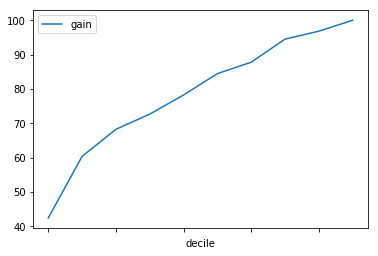

In [329]:
lift_df_final.plot.line(x='decile', y=['gain'])

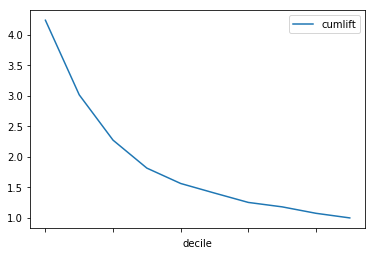

In [330]:
lift_df_final.plot.line(x='decile', y=['cumlift'])

# 6. Cost of Aquisition

Changing the probability cutoff did not change the lift gain chart

In [331]:
lift_df_final.loc[lift_df_final['decile'] < 6].total.sum()

4947

Since cost is Rs1 per call for prospects and we have 4947 prospects, the total cost is 4947